In [6]:
!git clone https://github.com/M1croZavr/ML_opt.git

Cloning into 'ML_opt'...
remote: Enumerating objects: 539, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 539 (delta 50), reused 53 (delta 20), pack-reused 423
Receiving objects: 100% (539/539), 25.50 MiB | 27.29 MiB/s, done.
Resolving deltas: 100% (253/253), done.


In [7]:
cd ML_opt/

/content/ML_opt/ML_opt/ML_opt


In [8]:
import numpy as np
from integerprogramming import optimize

# Метод Гомори

In [81]:
def inputData():
  nX=int(input('Enter number of variables'))
  nY=int(input('Enter number of restrictions'))
  A = []
  for i in range(nY): 
    z=[int(j) for j in np.zeros(nY)]
    z[i]=1
    A.append(list(map(int, input('Enter coefficients of constraint variables by lines').split()))+z)
  A=np.array(A)
  B = np.array([int(i) for i in input('Enter free members of restrictions:').split()])
  C = np.array([int(i) for i in input('Enter coefficients of objective function (Without multiplying by -1):').split()]+[int(i) for i in np.zeros(nY)])
  basis = np.array([i for i in input('Enter basis variables names in right order:').split()])
  variables = np.array([i for i in input('Enter all variables names in right order:').split()])
  target_vars = set(np.array([i for i in input('Enter Names of needed variables:').split()]))
  extrema =str(input('Which extrema to find?("max";"min"):'))
  return A,B,C,basis,variables,target_vars,extrema

Example:

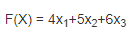

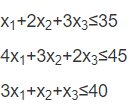

In [82]:
A,B,C,basis,variables,target_vars,extrema=inputData()
print(A,B,C,basis,variables,target_vars,extrema)

Enter number of variables3
Enter number of restrictions3
Enter coefficients of constraint variables by lines1 2 3
Enter coefficients of constraint variables by lines4 3 2
Enter coefficients of constraint variables by lines3 1 1
Enter free members of restrictions:35 45 40
Enter coefficients of objective function (Without multiplying by -1):4 5 6
Enter basis variables names in right order:y1 y2 y3
Enter all variables names in right order:x1 x2 x3 y1 y2 y3
Enter Names of needed variables:x1 x2 x3
Which extrema to find?("max";"min"):max
[[1 2 3 1 0 0]
 [4 3 2 0 1 0]
 [3 1 1 0 0 1]] [35 45 40] [4 5 6 0 0 0] ['y1' 'y2' 'y3'] ['x1' 'x2' 'x3' 'y1' 'y2' 'y3'] {'x2', 'x3', 'x1'} max


In [83]:
optimize.gomori_method(A, B, C, basis, variables, target_vars=target_vars,extrema=extrema)

All coefficients in string Z are >= 0
F(X) = 83.0, X: x3=9.0  x1=6.0  x2=1.0


(array([[  0. ,   0. ,   1. ,   0. ,  -1. ,   0. ,   1. ,   9. ],
        [  1. ,   0. ,   0. ,  -0.6,  -0.6,   0. ,   1. ,   6. ],
        [  0. ,   0. ,   0. ,   1. ,   1. ,   1. ,  -2. ,  12. ],
        [  0. ,   1. ,   0. ,   0.8,   1.8,   0. ,  -2. ,   1. ],
        [  0. ,   0. ,   0. ,  -1.6,  -0.6,   0. ,  -0. , -83. ]]),
 array(['x3', 'x1', 'y3', 'x2'], dtype='<U2'),
 array(['x1', 'x2', 'x3', 'y1', 'y2', 'y3', 't1'], dtype='<U2'))